In [12]:
# COVARIANCE AND CORRELATION MATRIX HEATMAP

# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

In [23]:
prices = pd.read_excel('data.xlsx', engine='openpyxl')
prices_stats = prices.describe()
prices_stats = prices_stats.transpose()
print(prices_stats)

           count        mean        std         min         25%         50%  \
WTI         56.0   51.596668  11.609753   16.257000   45.541309   51.743524   
BRENT       56.0   55.695442  13.784287   18.378500   46.512403   56.846426   
BONNY       56.0   56.609344  13.587582   20.536500   47.687739   56.791003   
USDiesel    56.0  116.362545  15.234757   83.949580  103.518908  119.810924   
UKDiesel    56.0  260.418359  20.495030  215.304114  246.335427  261.714723   
NGDiesel    56.0   84.317281  11.386815   58.729412   76.052409   85.736912   
USGas       56.0  106.093938  11.852924   78.655462   98.455882  105.693277   
UKGas       56.0  251.931378  17.492212  216.117473  241.009857  254.171297   
NGGas       56.0   57.624862   5.638373   38.334459   59.341908   59.734764   
MSCI-ACWI   56.0   63.377495   8.294928   47.034878   55.583170   66.471424   

                  75%         max  
WTI         57.883120   70.981429  
BRENT       65.296460   81.032174  
BONNY       66.167335 

                WTI     BRENT     BONNY  USDiesel  UKDiesel  NGDiesel  \
WTI        1.000000  0.983566  0.984723  0.815442  0.748102  0.257621   
BRENT      0.983566  1.000000  0.998182  0.881977  0.818291  0.324398   
BONNY      0.984723  0.998182  1.000000  0.878530  0.817875  0.315498   
USDiesel   0.815442  0.881977  0.878530  1.000000  0.955026  0.502102   
UKDiesel   0.748102  0.818291  0.817875  0.955026  1.000000  0.639145   
NGDiesel   0.257621  0.324398  0.315498  0.502102  0.639145  1.000000   
USGas      0.917231  0.930729  0.924427  0.878553  0.825721  0.322607   
UKGas      0.804052  0.849458  0.848085  0.929340  0.970562  0.560191   
NGGas      0.624101  0.608216  0.609036  0.609296  0.660426  0.531715   
MSCI-ACWI  0.522496  0.599759  0.575261  0.794478  0.780280  0.653710   

              USGas     UKGas     NGGas  MSCI-ACWI  
WTI        0.917231  0.804052  0.624101   0.522496  
BRENT      0.930729  0.849458  0.608216   0.599759  
BONNY      0.924427  0.848085  0.6090

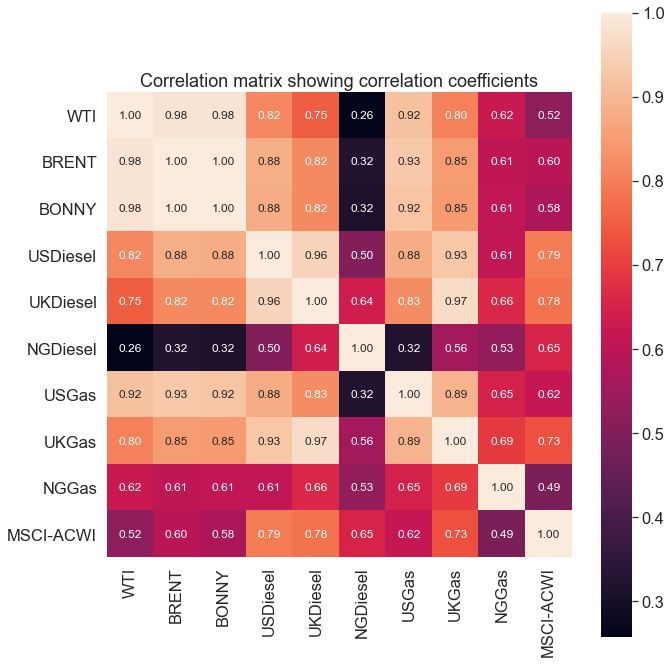

In [24]:
corrMatrix = prices.corr()
print (corrMatrix)

cols = ['WTI','BRENT','BONNY','USDiesel','UKDiesel','NGDiesel','USGas','UKGas','NGGas','MSCI-ACWI']
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)


hm = sns.heatmap(corrMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Correlation matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

                  WTI       BRENT       BONNY    USDiesel    UKDiesel  \
WTI        134.786372  157.402232  155.338490  144.228674  178.005008   
BRENT      157.402232  190.006579  186.954716  185.215457  231.174984   
BONNY      155.338490  186.954716  184.622396  181.858710  227.760084   
USDiesel   144.228674  185.215457  181.858710  232.097814  298.194382   
UKDiesel   178.005008  231.174984  227.760084  298.194382  420.046263   
NGDiesel    34.057068   50.917240   48.813631   87.102355  149.159289   
USGas      126.219719  152.066300  148.881332  158.645901  200.589209   
UKGas      163.287189  204.819414  201.570163  247.659332  347.949741   
NGGas       40.853742   47.271116   46.659344   52.338042   76.317978   
MSCI-ACWI   50.317476   68.576202   64.836515  100.399178  132.651378   

             NGDiesel       USGas       UKGas      NGGas   MSCI-ACWI  
WTI         34.057068  126.219719  163.287189  40.853742   50.317476  
BRENT       50.917240  152.066300  204.819414  47.2711

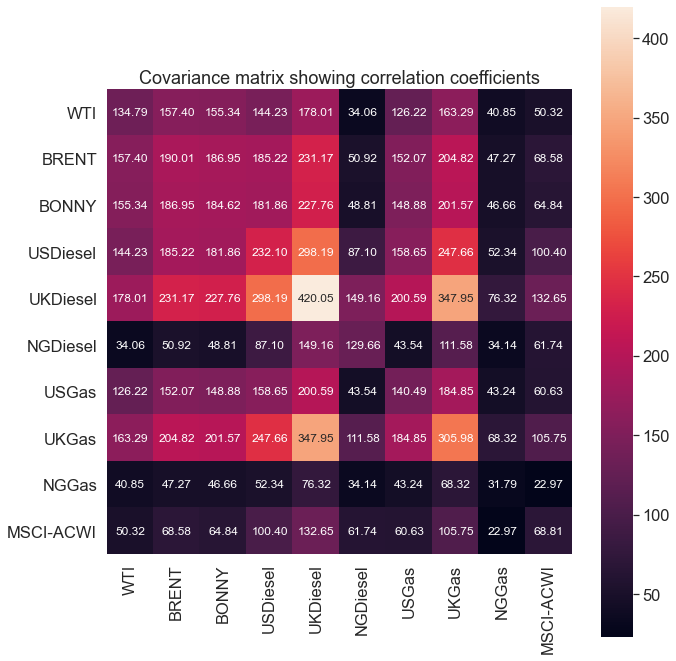

In [25]:
covMatrix = prices.cov()
print (covMatrix)

cols = ['WTI','BRENT','BONNY','USDiesel','UKDiesel','NGDiesel','USGas','UKGas','NGGas','MSCI-ACWI']
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)


hm = sns.heatmap(covMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [26]:
R = prices.iloc[:, 1:11]

In [27]:
R.columns

Index(['WTI', 'BRENT', 'BONNY', 'USDiesel', 'UKDiesel', 'NGDiesel', 'USGas',
       'UKGas', 'NGGas', 'MSCI-ACWI'],
      dtype='object')

In [28]:
# numpy has an API to calculate a covariance matrix
# y-axes will be used for calculations
R_cov = np.cov(R, rowvar=False)

# print the covariance matrix
import pandas as pd
R_covmat = pd.DataFrame(data=R_cov)


In [29]:
# numpy linear algebra module eig() api
# Compute the eigenvalues and eigenvectors of a square array
eig_values, eig_vectors = np.linalg.eig(R_cov)

# print values and corresponding vectors
eig_values
eig_vectors

array([[-0.26172826, -0.36468477, -0.3177962 , -0.00820311, -0.00391919,
         0.02103493,  0.22837621,  0.12402022,  0.77361075, -0.17599288],
       [-0.3267464 , -0.34248647, -0.26104474,  0.14689561, -0.15644644,
        -0.0403108 ,  0.09297456,  0.63795394, -0.48229705,  0.10898047],
       [-0.32120271, -0.34587497, -0.24648229,  0.0870168 , -0.25260368,
         0.01544338,  0.07844612, -0.75232025, -0.2649516 ,  0.04987838],
       [-0.37627273,  0.04296565,  0.29019726,  0.42052365, -0.09171641,
         0.28712718, -0.49805253,  0.03334361,  0.03532638, -0.50423032],
       [-0.50411666,  0.33477132,  0.3044303 , -0.10864612, -0.35747955,
         0.12662383,  0.06632178,  0.04256333,  0.21112499,  0.57853571],
       [-0.1576494 ,  0.62437152, -0.68814877, -0.01305208, -0.0827445 ,
        -0.20456839, -0.21995653, -0.00363544,  0.00143725, -0.12040244],
       [-0.27951441, -0.23028006,  0.0095674 , -0.14179218,  0.56456554,
        -0.33729416, -0.55136261, -0.04631698

In [30]:
featureVector = eig_vectors[:,:10]
featureVector

array([[-0.26172826, -0.36468477, -0.3177962 , -0.00820311, -0.00391919,
         0.02103493,  0.22837621,  0.12402022,  0.77361075, -0.17599288],
       [-0.3267464 , -0.34248647, -0.26104474,  0.14689561, -0.15644644,
        -0.0403108 ,  0.09297456,  0.63795394, -0.48229705,  0.10898047],
       [-0.32120271, -0.34587497, -0.24648229,  0.0870168 , -0.25260368,
         0.01544338,  0.07844612, -0.75232025, -0.2649516 ,  0.04987838],
       [-0.37627273,  0.04296565,  0.29019726,  0.42052365, -0.09171641,
         0.28712718, -0.49805253,  0.03334361,  0.03532638, -0.50423032],
       [-0.50411666,  0.33477132,  0.3044303 , -0.10864612, -0.35747955,
         0.12662383,  0.06632178,  0.04256333,  0.21112499,  0.57853571],
       [-0.1576494 ,  0.62437152, -0.68814877, -0.01305208, -0.0827445 ,
        -0.20456839, -0.21995653, -0.00363544,  0.00143725, -0.12040244],
       [-0.27951441, -0.23028006,  0.0095674 , -0.14179218,  0.56456554,
        -0.33729416, -0.55136261, -0.04631698

In [34]:
import numpy as np
import scipy.stats as stats

#perform Jarque-Bera test
print("WTI:", stats.jarque_bera(prices.WTI))
print("BRENT:", stats.jarque_bera(prices.BRENT))
print("BONNY:", stats.jarque_bera(prices.BONNY))
print("USDiesel:", stats.jarque_bera(prices.USDiesel))
print("UKDiesel:", stats.jarque_bera(prices.UKDiesel))
print("NGDiesel:", stats.jarque_bera(prices.NGDiesel))
print("USGas:", stats.jarque_bera(prices.USGas))
print("UKGas:", stats.jarque_bera(prices.UKGas))
print("NGGas:", stats.jarque_bera(prices.NGGas))

WTI: Jarque_beraResult(statistic=3.6027077356649597, pvalue=0.16507524679870333)
BRENT: Jarque_beraResult(statistic=1.7161863436773817, pvalue=0.42396974948964183)
BONNY: Jarque_beraResult(statistic=1.6547961489555367, pvalue=0.43718533139998816)
USDiesel: Jarque_beraResult(statistic=3.59966894178475, pvalue=0.16532625226375552)
UKDiesel: Jarque_beraResult(statistic=3.073273433622728, pvalue=0.21510333964638928)
NGDiesel: Jarque_beraResult(statistic=2.31208038444967, pvalue=0.3147299868901734)
USGas: Jarque_beraResult(statistic=1.5262680171975542, pvalue=0.46620305072101154)
UKGas: Jarque_beraResult(statistic=3.026717694131198, pvalue=0.22016921987114013)
NGGas: Jarque_beraResult(statistic=72.48703080800603, pvalue=2.220446049250313e-16)
